In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

In [3]:
# File to Load (Remember to change these)
files = glob.glob('*_data.csv')
# Read the City and Ride Data
dataDFs = []
for file in files:
    dataDFs.append(pd.read_csv(file))
# Combine the data into a single dataset
mergeData = pd.merge(dataDFs[1], dataDFs[0], how='outer',on='city')
# Display the data table for preview
cityData = mergeData
cityData1 = mergeData.drop_duplicates('city').reset_index(drop=True)
cityData1.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

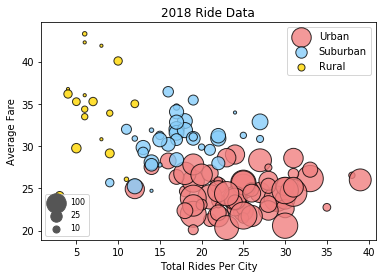

In [4]:
# Obtain the x and y coordinates for each of the three city types
typeUrb = cityData.loc[(cityData['type'] == 'Urban')]
typeSub = cityData.loc[(cityData['type'] == 'Suburban')]
typeRur = cityData.loc[(cityData['type'] == 'Rural')]
# Calculate on data set Urban
urbAvgFare = typeUrb.groupby(['city'])['fare'].mean()
urbTotRide = typeUrb.groupby(['city'])['ride_id'].count()
urbTotDrvr = typeUrb.groupby(['city'])['driver_count'].mean()
# Calculate on data set Suburban
subAvgFare = typeSub.groupby(['city'])['fare'].mean()
subTotRide = typeSub.groupby(['city'])['ride_id'].count()
subTotDrvr = typeSub.groupby(['city'])['driver_count'].mean()
# Calculate on data set Rural
rurbAvgFare = typeRur.groupby(['city'])['fare'].mean()
rurTotRide = typeRur.groupby(['city'])['ride_id'].count()
rurTotDrvr = typeRur.groupby(['city'])['driver_count'].mean()
# Build the scatter plots for each city types
plt.scatter(urbTotRide, urbAvgFare, s=urbTotDrvr*10, marker='o', facecolors='lightcoral', edgecolors='black', alpha=0.8, label='Urban')
plt.scatter(subTotRide, subAvgFare, s=subTotDrvr*10, marker='o', facecolors='lightskyblue', edgecolors='black', alpha=0.8, label='Suburban')
plt.scatter(rurTotRide, rurbAvgFare, s=rurTotDrvr*10, marker='o', facecolors='gold', edgecolors='black', alpha=0.8, label='Rural')
# Incorporate the other graph properties
plt.title('2018 Ride Data')
plt.xlabel('Total Rides Per City')
plt.ylabel('Average Fare')
# Create a legend
legMain = plt.legend(loc='upper right')
# Incorporate a text label regarding circle size
gLG = plt.scatter([],[], s=urbTotDrvr*10, marker='o', color='#555555')
gMD = plt.scatter([],[], s=subTotDrvr*10, marker='o', color='#555555')
gSM = plt.scatter([],[], s=rurTotDrvr*10, marker='o', color='#555555')
# Add secondary Legend
ax = plt.gca().add_artist(legMain)
plt.legend((gLG,gMD,gSM),('100', '25', '10'),scatterpoints=1,loc='lower left',ncol=1,fontsize=8)
# Save Figure
plt.savefig("2018 Ride Sharing.png")
# Show PLot
ax.grid = True
plt.show()

## Total Fares by City Type

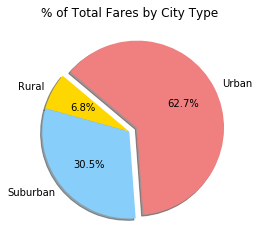

In [5]:
# Calculate Type Percents
totFare = cityData.groupby(['type'])['fare'].sum()
# Build Pie Chart
label = ['Rural', 'Suburban', 'Urban']
color = ['gold', 'lightskyblue', 'lightcoral']
expl = (0,0,0.1)
plt.pie(totFare, labels=label, autopct='%1.1f%%', colors=color, explode=expl, shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig("%_of_Total_Fares.png")
plt.show()

## Total Rides by City Type

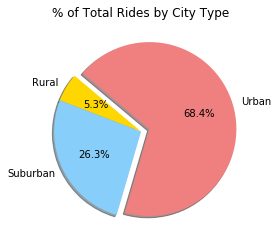

In [6]:
# Calculate Ride Percents
totRds = cityData.groupby(['type'])['ride_id'].count()
# Build Pie Chart
label = ['Rural', 'Suburban', 'Urban']
color = ['gold', 'lightskyblue', 'lightcoral']
expl = (0,0,0.1)
plt.pie(totRds, labels=label, autopct='%1.1f%%', colors=color, explode=expl, shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig("%_of_Total_Rides.png")
# Show Figure
plt.show()

## Total Drivers by City Type

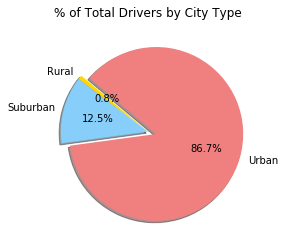

In [7]:
# Calculate Ride Percents
totDvrs = cityData.groupby(['type'])['driver_count'].sum()
# Build Pie Chart
label = ['Rural', 'Suburban', 'Urban']
color = ['gold', 'lightskyblue', 'lightcoral']
expl = (0,0,0.1)
plt.pie(totDvrs, labels=label, autopct='%1.1f%%', colors=color, explode=expl, shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig("%_of_Total_Drivers.png")
# Show Figure
plt.show()